## Importação das Bibliotecas e Carregamento dos Dados

In [1]:
# Importacao Bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, StratifiedKFold
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Carregamento dos dados
caminho = r"C:\Users\glauber.lima\Desktop\Glauber\5-projetos\5-MACHINE_LEARNING\1-CLASSIFICACAO\2-ESTUDANTE\ai_assistant_usage_student_life.csv"
df = pd.read_csv(caminho)

In [3]:
# Primeiras Linhas
df.head()

,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating
0,SESSION00001,Undergraduate,Computer Science,2024-11-03,31.20,11,Studying,2,Assignment Completed,True,1.0
1,SESSION00002,Undergraduate,Psychology,2024-08-25,13.09,6,Studying,3,Assignment Completed,True,2.0
2,SESSION00003,Undergraduate,Business,2025-01-12,19.22,5,Coding,3,Assignment Completed,True,3.3
3,SESSION00004,Undergraduate,Computer Science,2025-05-06,3.70,1,Coding,3,Assignment Completed,True,3.5
4,SESSION00005,Undergraduate,Psychology,2025-03-18,28.12,9,Writing,3,Assignment Completed,True,2.9


In [4]:
# Dimensão
df.shape

(10000, 11)

## Limpeza e Transformação dos Dados

In [5]:
# Renomear colunas
columns = ['id_sessao','nivel_estudantil','disciplina','data','duracao_com_ia_min','total_prompts','tipo_tarefa','nivel_assistencia_ia','objetivo','usou_novamente','taxa_satisfacao']
df.columns = columns
print(df.columns)

Index(['id_sessao', 'nivel_estudantil', 'disciplina', 'data',
       'duracao_com_ia_min', 'total_prompts', 'tipo_tarefa',
       'nivel_assistencia_ia', 'objetivo', 'usou_novamente',
       'taxa_satisfacao'],
      dtype='object')


In [6]:
# Checando informacoes gerais
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id_sessao             10000 non-null  object 
 1   nivel_estudantil      10000 non-null  object 
 2   disciplina            10000 non-null  object 
 3   data                  10000 non-null  object 
 4   duracao_com_ia_min    10000 non-null  float64
 5   total_prompts         10000 non-null  int64  
 6   tipo_tarefa           10000 non-null  object 
 7   nivel_assistencia_ia  10000 non-null  int64  
 8   objetivo              10000 non-null  object 
 9   usou_novamente        10000 non-null  bool   
 10  taxa_satisfacao       10000 non-null  float64
dtypes: bool(1), float64(2), int64(2), object(6)
memory usage: 791.1+ KB


In [7]:
# Checando duplicidade
df.duplicated().sum()

np.int64(0)

In [8]:
# Checando dados ausentes
df.isna().sum()

id_sessao               0
nivel_estudantil        0
disciplina              0
data                    0
duracao_com_ia_min      0
total_prompts           0
tipo_tarefa             0
nivel_assistencia_ia    0
objetivo                0
usou_novamente          0
taxa_satisfacao         0
dtype: int64

In [9]:
# Visualizando os Valores Unicos das Variaveis Categoricas
espaco = '-' * 70
print('nivel_estudantil: ', df['nivel_estudantil'].unique())
print(espaco)
print('disciplina: ', df['disciplina'].unique())
print(espaco)
print('tipo_tarefa: ', df['tipo_tarefa'].unique())
print(espaco)
print('objetivo: ', df['objetivo'].unique())

nivel_estudantil:  ['Undergraduate' 'Graduate' 'High School']
----------------------------------------------------------------------
disciplina:  ['Computer Science' 'Psychology' 'Business' 'Biology' 'Math' 'History'
 'Engineering']
----------------------------------------------------------------------
tipo_tarefa:  ['Studying' 'Coding' 'Writing' 'Brainstorming' 'Homework Help' 'Research']
----------------------------------------------------------------------
objetivo:  ['Assignment Completed' 'Idea Drafted' 'Confused' 'Gave Up']


In [10]:
# Reajustando o nome das categorias (traduzindo para pt-br)
mapeamentos = {
    'nivel_estudantil': {'Undergraduate': 'Graduando','Graduate':'Graduado','High School':'Ensino Medio'},
    'disciplina' : {'Computer Science':'Ciencias Computacao','Psychology':'Psicologia','Business':'Negocios','Biology':'Biologia','Math':'Matematica',
                    'History':'Historia','Engineering':'Engenharia'},
    'tipo_tarefa' : {'Studying':'Estudo','Coding':'Codigo','Writing':'Escrita','Brainstorming':'Ideias','Homework Help':'Tarefa de Casa',
                     'Research':'Pesquisa'},
    'objetivo' : {'Assignment Completed':'Tarefa Concluida','Idea Drafted':'Ideia Elaborada','Confused':'Confuso','Gave Up':'Desistiu'}
}

df.replace(mapeamentos, inplace=True)

In [11]:
print('nivel_estudantil: ', df['nivel_estudantil'].unique())
print(espaco)
print('disciplina: ', df['disciplina'].unique())
print(espaco)
print('tipo_tarefa: ', df['tipo_tarefa'].unique())
print(espaco)
print('objetivo: ', df['objetivo'].unique())

nivel_estudantil:  ['Graduando' 'Graduado' 'Ensino Medio']
----------------------------------------------------------------------
disciplina:  ['Ciencias Computacao' 'Psicologia' 'Negocios' 'Biologia' 'Matematica'
 'Historia' 'Engenharia']
----------------------------------------------------------------------
tipo_tarefa:  ['Estudo' 'Codigo' 'Escrita' 'Ideias' 'Tarefa de Casa' 'Pesquisa']
----------------------------------------------------------------------
objetivo:  ['Tarefa Concluida' 'Ideia Elaborada' 'Confuso' 'Desistiu']


In [12]:
# Visualizando os valores unicos por categoria
print(df['nivel_estudantil'].value_counts().sort_values(ascending = False))
print(espaco)
print(df['disciplina'].value_counts().sort_values(ascending = False))
print(espaco)
print(df['tipo_tarefa'].value_counts().sort_values(ascending = False))
print(espaco)
print(df['objetivo'].value_counts().sort_values(ascending = False))
print(espaco)

nivel_estudantil
Graduando       5978
Ensino Medio    2027
Graduado        1995
Name: count, dtype: int64
----------------------------------------------------------------------
disciplina
Biologia               1458
Ciencias Computacao    1445
Engenharia             1430
Matematica             1422
Psicologia             1418
Historia               1417
Negocios               1410
Name: count, dtype: int64
----------------------------------------------------------------------
tipo_tarefa
Escrita           3101
Estudo            2040
Tarefa de Casa    1959
Codigo            1948
Ideias             476
Pesquisa           476
Name: count, dtype: int64
----------------------------------------------------------------------
objetivo
Tarefa Concluida    4768
Ideia Elaborada     2866
Confuso             1613
Desistiu             753
Name: count, dtype: int64
----------------------------------------------------------------------


In [13]:
# Resumo estatistico
df.describe()

,duracao_com_ia_min,total_prompts,nivel_assistencia_ia,taxa_satisfacao
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,19.846467,5.607500,3.479500,3.417780
std,13.897302,4.648764,0.991805,1.143331
min,0.030000,1.000000,1.000000,1.000000
25%,9.630000,2.000000,3.000000,2.600000
50%,16.650000,4.000000,4.000000,3.500000
75%,26.670000,8.000000,4.000000,4.400000
max,110.810000,39.000000,5.000000,5.000000


A partir do resumo estatístico, é possível perceber a amplitude dos dados e, possivlemente, a distribuição que cada variável possui, além da presença ou não de outliers. Para esses dados, as variáveis 'duracao_com_ia_min' e 'total_prompts' apresentam uma distribuição assimétrica e a presença de outliers. Confirmaremos adiante essas hipóteses através da análise gráfica.

In [14]:
# Engenharia de atributos -> atendeu a expectativa
df['atendeu_a_expectativa'] = df['objetivo'].apply(lambda x: 1 if x in ('Tarefa Concluida', 'Ideia Elaborada') else 0)

In [16]:
# Validando a criação da nova coluna
pd.crosstab(df['objetivo'], df['atendeu_a_expectativa'], margins=True)

atendeu_a_expectativa,0,1,All
objetivo,,,
Confuso,1613,0,1613
Desistiu,753,0,753
Ideia Elaborada,0,2866,2866
Tarefa Concluida,0,4768,4768
All,2366,7634,10000


Note que ,na maioria dos casos, a ajuda da IA atendeu as expectativas em relação ao auxílio que lhe foi solicitado. Em cerca de 76% as epectativas foram atendidas (ou a ideia foi elaborada ou a tarefa foi concluída), enquanto que nos 23% restantes as expectativas não foram atendidas (desistência ou a IA apresentou ideias confusas (alucinação)).

## Análise Exploratória dos Dados

In [17]:
# Amostra
df.sample(5)

,id_sessao,nivel_estudantil,disciplina,data,duracao_com_ia_min,total_prompts,tipo_tarefa,nivel_assistencia_ia,objetivo,usou_novamente,taxa_satisfacao,atendeu_a_expectativa
2783,SESSION02784,Graduando,Psicologia,2025-04-02,8.28,2,Pesquisa,4,Ideia Elaborada,True,4.8,1
5905,SESSION05906,Ensino Medio,Engenharia,2024-11-09,11.61,4,Estudo,4,Ideia Elaborada,True,2.5,1
1406,SESSION01407,Ensino Medio,Engenharia,2024-07-15,15.71,4,Escrita,5,Confuso,False,4.9,0
7320,SESSION07321,Ensino Medio,Historia,2024-08-24,32.19,7,Escrita,3,Tarefa Concluida,True,2.9,1
9818,SESSION09819,Graduado,Ciencias Computacao,2025-01-08,7.36,2,Escrita,3,Ideia Elaborada,True,3.2,1


In [18]:
# Tabela de contingencia: nivel estudantil vs tipo_tarefa
pd.crosstab(df['nivel_estudantil'], df['tipo_tarefa'], margins=True)

tipo_tarefa,Codigo,Escrita,Estudo,Ideias,Pesquisa,Tarefa de Casa,All
nivel_estudantil,,,,,,,
Ensino Medio,373,630,442,90,97,395,2027
Graduado,399,602,382,99,114,399,1995
Graduando,1176,1869,1216,287,265,1165,5978
All,1948,3101,2040,476,476,1959,10000


In [19]:
# Tabela de contingencia: nivel estudantil vs objetivo
pd.crosstab(df['nivel_estudantil'], df['usou_novamente'], margins=True)

usou_novamente,False,True,All
nivel_estudantil,,,
Ensino Medio,581,1446,2027
Graduado,592,1403,1995
Graduando,1763,4215,5978
All,2936,7064,10000


In [20]:
# Tabela de contingencia: nivel estudantil vs objetivo
pd.crosstab(df['nivel_estudantil'], df['atendeu_a_expectativa'], margins=True)

atendeu_a_expectativa,0,1,All
nivel_estudantil,,,
Ensino Medio,482,1545,2027
Graduado,492,1503,1995
Graduando,1392,4586,5978
All,2366,7634,10000


In [21]:
# Media de total de prompts por nivel estudantil
df.groupby('nivel_estudantil')['total_prompts'].mean().round(2)

nivel_estudantil
Ensino Medio    5.62
Graduado        5.79
Graduando       5.54
Name: total_prompts, dtype: float64

In [22]:
# Media de segundos por nivel estudantil
df.groupby('nivel_estudantil')['duracao_com_ia_min'].mean().round(2)

nivel_estudantil
Ensino Medio    20.02
Graduado        20.25
Graduando       19.65
Name: duracao_com_ia_min, dtype: float64

## Visualização de Dados

In [23]:
# Setando o layout dark grid
sns.set_style('darkgrid')

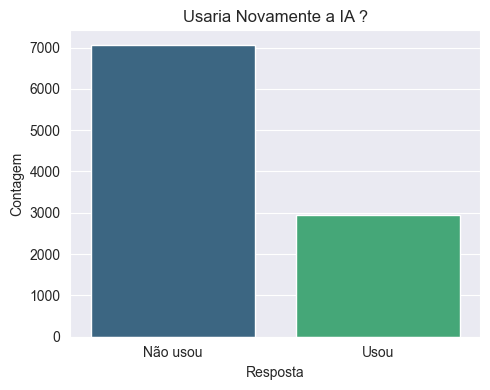

In [24]:
# Variavel target
plt.figure(figsize=(5, 4))
sns.countplot(data=df, x='usou_novamente', order=df['usou_novamente'].value_counts().index, palette='viridis')
plt.xlabel('Resposta')
plt.ylabel('Contagem')
plt.title('Usaria Novamente a IA ?')
plt.xticks([True, False], ['Usou', 'Não usou'])
plt.tight_layout()
plt.show()

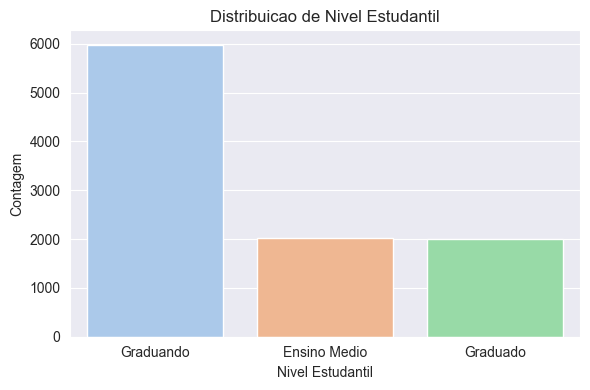

In [ ]:
# Quantidade de estudantes por escolaridade
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='nivel_estudantil', order=df['nivel_estudantil'].value_counts().index, palette='pastel')
plt.xlabel('Nivel Estudantil')
plt.ylabel('Contagem')
plt.title('Distribuicao de Nivel Estudantil')
plt.xticks()
plt.tight_layout()
plt.show()

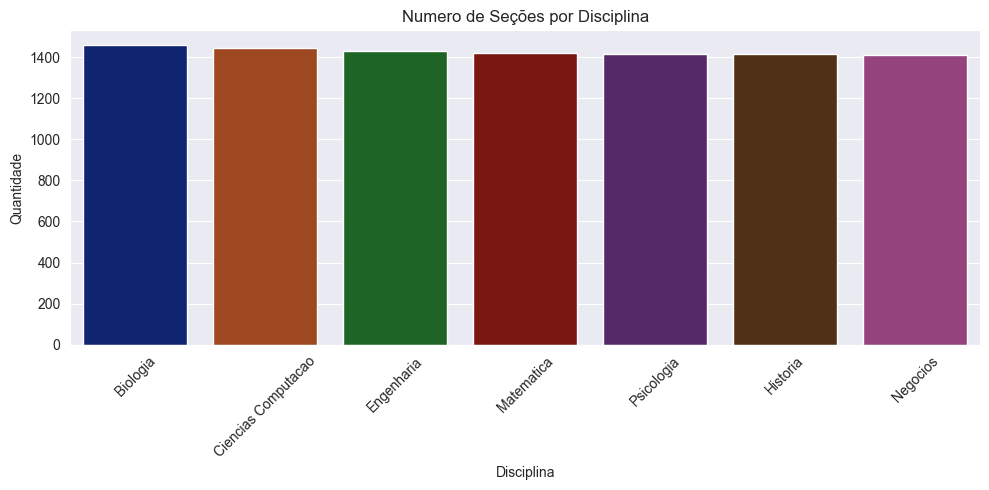

In [32]:
# Secoes por Disciplina
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='disciplina', order=df['disciplina'].value_counts().index, palette='dark')
plt.title('Numero de Seções por Disciplina')
plt.xlabel('Disciplina')
plt.ylabel('Quantidade')
plt.xticks(rotation = 45, fontsize = 10)
plt.tight_layout()
plt.show()

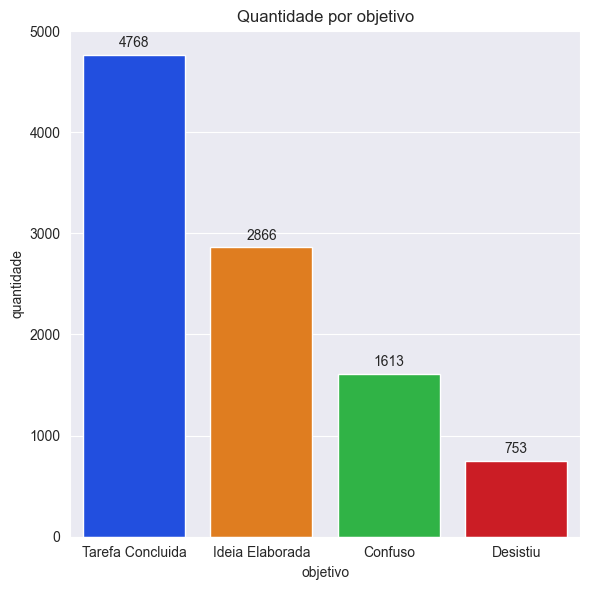

In [33]:
# Quantidade por objetivo
plt.figure(figsize=(6, 6))
ax = sns.countplot(x='objetivo', data=df, palette='bright')
for container in ax.containers:
    ax.bar_label(container, label_type = 'edge', padding = 3)
plt.title('Quantidade por objetivo')
plt.xlabel('objetivo')
plt.ylabel('quantidade')
plt.xticks()
plt.tight_layout()
plt.show()

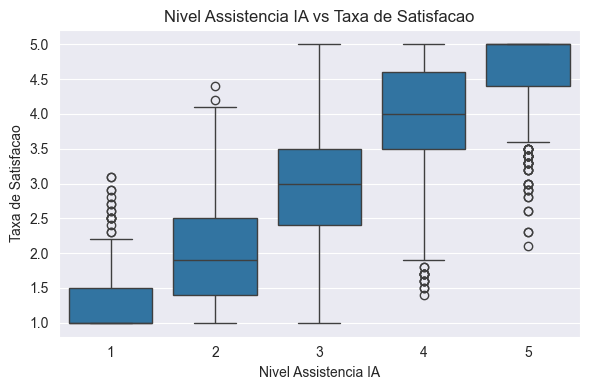

In [34]:
# Nivel Assistencia IA vs Taxa de Satisfacao

plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='nivel_assistencia_ia', y='taxa_satisfacao')
plt.title('Nivel Assistencia IA vs Taxa de Satisfacao')
plt.xlabel('Nivel Assistencia IA')
plt.ylabel('Taxa de Satisfacao')
plt.tight_layout()
plt.show()

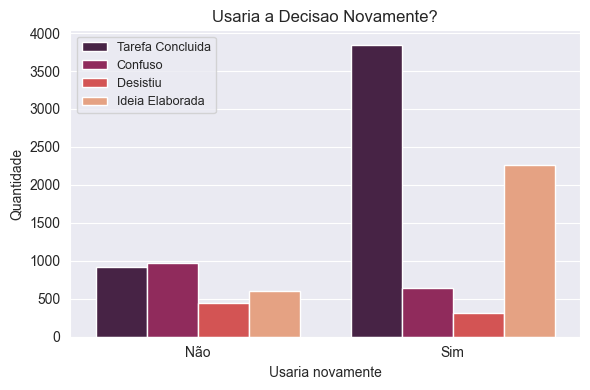

In [40]:
# Usaria a Decisao Novamente
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='usou_novamente', hue='objetivo', palette='rocket')
plt.title('Usaria a Decisao Novamente?')
plt.xlabel('Usaria novamente')
plt.ylabel('Quantidade')
plt.xticks(ticks = [False, True], labels=['Não', 'Sim'])
plt.legend(prop = {'size': 9}, loc = 'upper left')
plt.tight_layout()
plt.show()

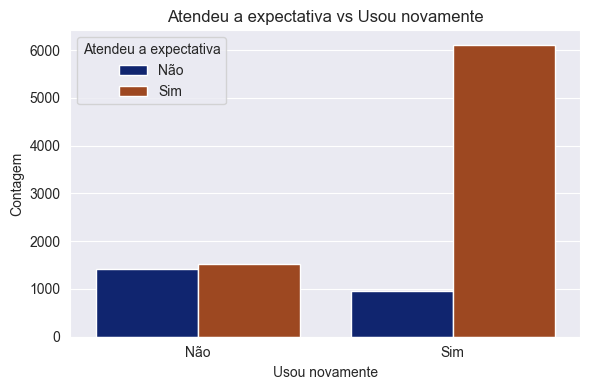

In [54]:
plt.figure(figsize = (6,4))
sns.countplot(data = df, x = 'usou_novamente', hue='atendeu_a_expectativa', palette='dark')
plt.xlabel('Usou novamente')
plt.ylabel('Contagem')
plt.title('Atendeu a expectativa vs Usou novamente')
plt.xticks(ticks = [False, True], labels=['Não', 'Sim'])
plt.legend(['Não', 'Sim'], title='Atendeu a expectativa')
plt.tight_layout()
plt.show()

In [37]:
# Colunas numericas
numericas = df.select_dtypes(include=['int64','float64']).columns.to_list()
numericas.remove('atendeu_a_expectativa')
numericas

['duracao_com_ia_min',
 'total_prompts',
 'nivel_assistencia_ia',
 'taxa_satisfacao']

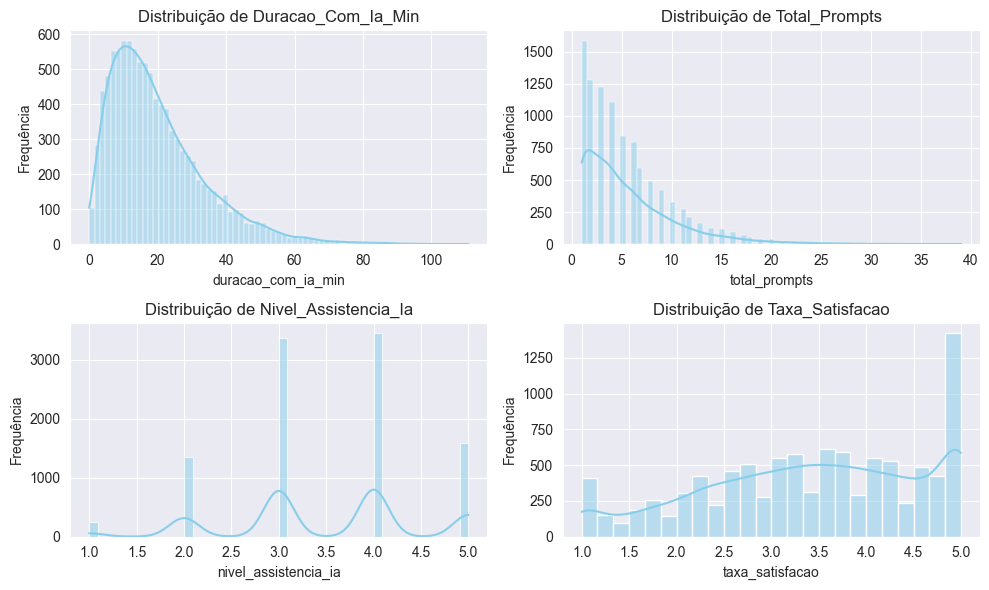

In [38]:
# Distribuição das variáveis numéricas
fig, ax = plt.subplots(2,2,figsize = (10,6))
ax = ax.ravel()

for i, c in enumerate(numericas):
    sns.histplot(data = df, x = c, kde = True, ax = ax[i], color='skyblue')
    ax[i].set_title(f'Distribuição de {c.title()}')
    ax[i].set_xlabel(c)
    ax[i].set_ylabel('Frequência')
plt.tight_layout()
plt.show()

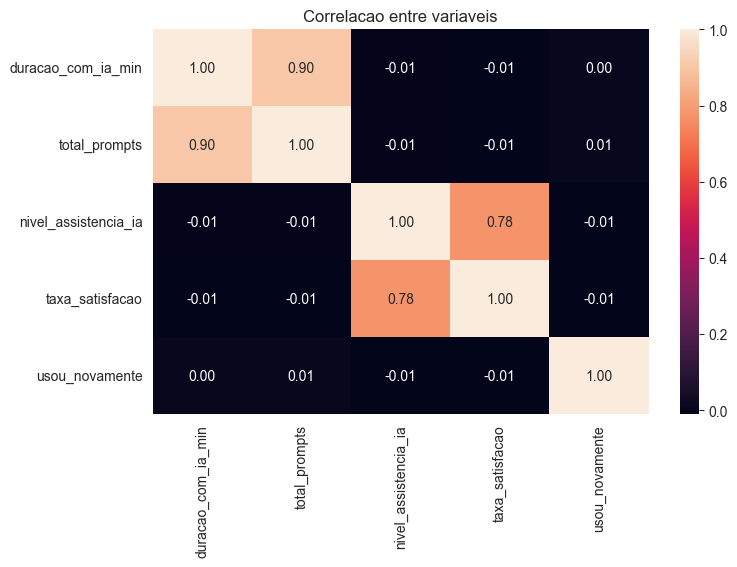

In [64]:
# Correlação entre total_prompts e duracao_com_ia_seg
df_cor = df[numericas].corr()
plt.figure(figsize = (8,5))
sns.heatmap(df_cor, annot = True, fmt = '.2f')
plt.title('Correlacao entre variaveis')
plt.show()

A partir da análise gráfica confirmamos que as distribuições das variáveis numéricas são assimétricas e há a presença de outliers. Além disso, por meio da matriz de correlação, algumas variáveis preditoras são muito correlacionadas, casos de 'duracao_com_ia_min' com 'total_prompts' e 'nivel_assistencia_ia' com 'taxa_satisfacao' e isso pode impactar na performance de alguns algoritmos ao criar o modelo. Além disso, podemos perceber que, mesmo que alguns usuários não obtiveram sucesso em alguma atividade, eles ainda sim usariam a IA novamente; já outros usuários ainda que obtiveram sucesso no uso da IA não a usariam novamente.

## Pre processamento

### Divisão dos dados

In [55]:
# Amostra Aleatoria
df.sample(5)

,id_sessao,nivel_estudantil,disciplina,data,duracao_com_ia_min,total_prompts,tipo_tarefa,nivel_assistencia_ia,objetivo,usou_novamente,taxa_satisfacao,atendeu_a_expectativa
9246,SESSION09247,Ensino Medio,Negocios,2025-06-21,4.46,1,Escrita,4,Ideia Elaborada,True,4.3,1
8767,SESSION08768,Ensino Medio,Ciencias Computacao,2024-08-04,47.11,11,Escrita,2,Desistiu,True,2.4,0
1612,SESSION01613,Graduando,Ciencias Computacao,2025-02-27,1.77,1,Tarefa de Casa,3,Tarefa Concluida,True,2.2,1
4730,SESSION04731,Ensino Medio,Matematica,2024-06-30,11.42,4,Estudo,5,Tarefa Concluida,True,5.0,1
5628,SESSION05629,Graduando,Biologia,2025-03-14,24.29,7,Tarefa de Casa,3,Tarefa Concluida,True,1.9,1


In [77]:
# Criando uma copia do dataframe
dados = df.copy()
dados.drop(columns = ['id_sessao','data','objetivo', 'duracao_com_ia_min', 'nivel_assistencia_ia'], axis=1, inplace=True)

In [78]:
# Visualização
dados.head()

,nivel_estudantil,disciplina,total_prompts,tipo_tarefa,usou_novamente,taxa_satisfacao,atendeu_a_expectativa
0,Graduando,Ciencias Computacao,11,Estudo,True,1.0,1
1,Graduando,Psicologia,6,Estudo,True,2.0,1
2,Graduando,Negocios,5,Codigo,True,3.3,1
3,Graduando,Ciencias Computacao,1,Codigo,True,3.5,1
4,Graduando,Psicologia,9,Escrita,True,2.9,1


In [79]:
# Proporção da variável target
print(dados['usou_novamente'].value_counts())
print(espaco)
print(dados['usou_novamente'].value_counts(normalize=True).round(2))

usou_novamente
True     7064
False    2936
Name: count, dtype: int64
----------------------------------------------------------------------
usou_novamente
True     0.71
False    0.29
Name: proportion, dtype: float64


In [80]:
# Divisão dos dados em preditoras e target
x = dados.drop(columns='usou_novamente', axis=1)
y = dados['usou_novamente']
print('Dimensão de x: ',x.shape)
print('Dimensão de y: ',y.shape)

Dimensão de x:  (10000, 6)
Dimensão de y:  (10000,)


In [81]:
# Divisão dos dados em treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y,test_size=0.2,random_state=42, stratify=y)
print('registros de treino: ',x_treino.shape[0])
print('registros de teste: ',x_teste.shape[0])

registros de treino:  8000
registros de teste:  2000


### Pipeline

In [82]:
# Divisão por tipos de dados
numericas = x_treino.select_dtypes(include=['int64', 'float64']).columns.to_list()
categoricas = x_treino.select_dtypes(exclude=['int64', 'float64']).columns.to_list()
print('Variáveis numéricas: ',numericas)
print('Variáveis categóricas: ',categoricas)

Variáveis numéricas:  ['total_prompts', 'taxa_satisfacao', 'atendeu_a_expectativa']
Variáveis categóricas:  ['nivel_estudantil', 'disciplina', 'tipo_tarefa']


In [83]:
# Combinando os passos de pré-processamento
preprocessor = ColumnTransformer(
    transformers = [
        ('num', RobustScaler(), numericas),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categoricas)])

### Modelagem Preditiva

In [84]:
# Calcula a proporção dos pesos
neg_count = sum(y_treino == 0)
pos_count = sum(y_treino == 1)
taxa_peso = neg_count / pos_count

In [85]:
# Modelos, Métricas de validação e validação cruzada
resultados_cv = []
modelos = {'LogReg': LogisticRegression(class_weight='balanced', max_iter=1000),
'RandomForest': RandomForestClassifier(class_weight='balanced'),
'DecisionTree': DecisionTreeClassifier(class_weight='balanced'),
'XGB': xgb.XGBClassifier(objective='binary:logistic', scale_pos_weight=taxa_peso)}
scoring = {'accuracy': 'accuracy', 'roc_auc': 'roc_auc'}
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

In [86]:
# Loop para rodar os modelos e fazer a validação cruzada
for nome, modelo in modelos.items():
    pipe = Pipeline(steps=[('preprocessor', preprocessor), ('model', modelo)])
    cv_result = cross_validate(pipe, x_treino, y_treino, cv=cv, scoring=scoring, return_train_score=False)
    resultados_cv.append({
        'Algoritmo': nome,
        'Acurácia': np.mean(cv_result['test_accuracy']),
        'ROC': np.mean(cv_result['test_roc_auc'])
    })

In [87]:
# DataFrame dos resultados
df_cv = pd.DataFrame(resultados_cv)
df_cv.sort_values(by='ROC', ascending=False)

,Algoritmo,Acurácia,ROC
0,LogReg,0.754625,0.678207
3,XGB,0.675750,0.656953
1,RandomForest,0.689376,0.642895
2,DecisionTree,0.623501,0.560377


## Conclusão

Após realização do pipeline com validação cruzada, o modelo que apresentou melhor performance foi o de regressão logística. Verificoamos as métricas de acurácia e score auc. Utilizamos o hiperparâmetro ```class weight = 'balanced'``` para garantir que o modelo atribua maior peso aos casos minoritários, uma ve que o dataset está desbalanceado.